![us_bank_stadium_superbowl_2018](us_bank_stadium_superbowl_2018.png)

Whether or not you like football, the Super Bowl is a spectacle. There's a little something for everyone at your Super Bowl party. Drama in the form of blowouts, comebacks, and controversy for the sports fan. There are the ridiculously expensive ads, some hilarious, others gut-wrenching, thought-provoking, and weird. The half-time shows with the biggest musicians in the world, sometimes riding giant mechanical tigers or leaping from the roof of the stadium. 

The dataset we'll use was scraped and polished from Wikipedia. It is made up of three CSV files, one with game data, one with TV data, and one with halftime musician data for 52 Super Bowls through 2018. 

## The Data

Three datasets have been provided, and summaries and previews of each are presented below.

### 1. **halftime_musicians.csv**

This dataset contains information about the musicians who performed during the halftime shows of various Super Bowl games. The structure is shown below, and it applies to all remaining files.

| Column       | Description                                                                                  |
|--------------|----------------------------------------------------------------------------------------------|
| `'super_bowl'` | The Super Bowl number (e.g., 52 for Super Bowl LII).                                         |
| `'musician'`   | The name of the musician or musical group that performed during the halftime show.           |
| `'num_songs'`  | The number of songs performed by the musician or group during the halftime show.             |

### 2. **super_bowls.csv**

This dataset provides details about each Super Bowl game, including the date, location, participating teams, and scores, including the points difference between the winning and losing team (`'difference_pts'`).

### 3. **tv.csv**

This dataset contains television viewership statistics and advertisement costs related to each Super Bowl.

In [12]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Load the CSV data into DataFrames
super_bowls = pd.read_csv("datasets/super_bowls.csv")
super_bowls.head()

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [3]:
tv = pd.read_csv("datasets/tv.csv")
tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [4]:
halftime_musicians = pd.read_csv("datasets/halftime_musicians.csv")
halftime_musicians.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

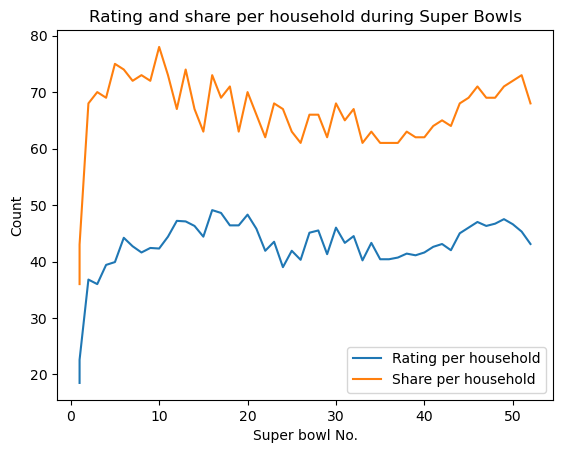

In [8]:
plt.plot(tv['super_bowl'], tv['rating_household'], label = 'Rating per household')
plt.plot(tv['super_bowl'], tv['share_household'], label = 'Share per household')
plt.xlabel('Super bowl No.')
plt.ylabel('Count')
plt.legend()
plt.title('Rating and share per household during Super Bowls')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

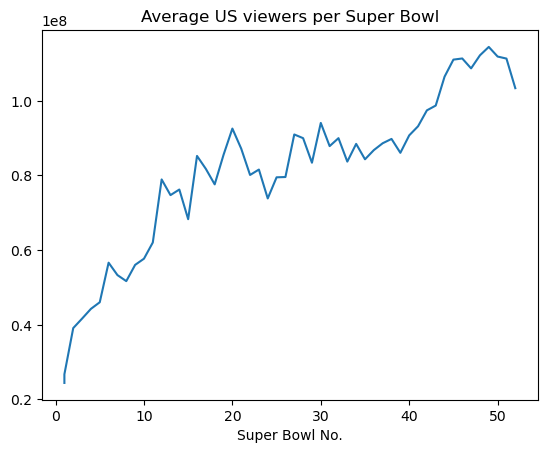

In [10]:
plt.plot(tv['super_bowl'], tv['avg_us_viewers'], label = 'Average US viewers')
plt.xlabel('Super Bowl No.')
plt.title('Average US viewers per Super Bowl')
plt.show

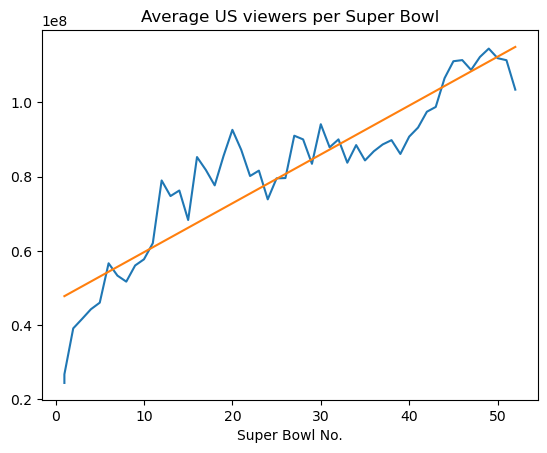

In [16]:
plt.plot(tv['super_bowl'], tv['avg_us_viewers'], label = 'Average US viewers')
plt.xlabel('Super Bowl No.')
plt.title('Average US viewers per Super Bowl')

z = np.polyfit(tv['super_bowl'],tv['avg_us_viewers'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(tv['super_bowl'], p(tv['super_bowl']))

In [17]:
viewership_increased = True

In [19]:
large_diff = super_bowls[super_bowls['difference_pts'] > 40]
large_diff

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45


In [24]:
difference = len(large_diff)
difference

1

In [26]:
halftime_musicians.value_counts(subset = 'musician')
#it is clear artists can perform repeatedly

musician
Grambling State University Tiger Marching Band    6
Up with People                                    4
Al Hirt                                           4
The Human Jukebox                                 3
Spirit of Troy                                    2
                                                 ..
Katy Perry                                        1
Judy Mallett                                      1
Jessica Simpson                                   1
Janet Jackson                                     1
will.i.am                                         1
Name: count, Length: 111, dtype: int64

In [36]:
musicians = halftime_musicians.groupby(['musician']).sum()
#musicians

,super_bowl,num_songs
musician,,
Aerosmith,35,3.0
Al Hirt,23,0.0
Andy Williams,7,0.0
Arizona State University Sun Devil Marching Band,49,0.0
Arturo Sandoval,29,2.0
...,...,...
Woody Herman,7,0.0
Wynonna Judd,28,2.0
Youth Orchestra Los Angeles,50,3.0


In [48]:
top_musicians = musicians.sort_values(['num_songs'], ascending = False)
top_musicians

,super_bowl,num_songs
musician,,
Justin Timberlake,90,12.0
Beyoncé,97,10.0
Diana Ross,30,10.0
Grambling State University Tiger Marching Band,79,9.0
Bruno Mars,98,9.0
...,...,...
Doc Severinsen,4,0.0
Southeast Missouri State Marching Band,5,0.0
Ella Fitzgerald,6,0.0


In [49]:
most_songs = top_musicians.index[0]
most_songs

'Justin Timberlake'